# Clustering

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

spotify = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/00 raw data/spotify_songs.csv"
)
spotify.head()

music_covariates = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

other_covariates = ['track_album_name', 'track_name', 'track_artist']

music = spotify[music_covariates] #subset for music covariates only
music_X = spotify[music_covariates]
music_Y = spotify['playlist_genre']

### Clustering Method #1: K-means (simple)
* We first did an elbow search to find the number of clusters that minimized the wcss (within cluster sum of squares error) adn we got that optimal number is 4. However, if we want to compare to spotify's classes we may want to do 6.
... still did it just to see :)

Eval Metrics:
- **PURITY:** In general, purity increases as the number of clusters increases. For instance, if we have a model that groups each observation in a separate cluster, the purity becomes one. For this very reason, purity cannot be used as a trade off between the number of clusters and clustering quality.
- **NMI:** NMI tells us how much the uncertainty about class labels decreases when we know the cluster labels. One advantage of NMI is that we can use it to compare different clustering models that have different number of clusters because NMI is normalized.
- **Rand Index:** Rand index is a measure of similarity between two clusterings. The rand_score function of scikit-learn can be used to calculate rand index. We can use it to compare actual class labels (spotify) and predicted cluster labels (ours) to evaluate the performance of a clustering algorithm.

**ALL THESE ARE FOR EVALUATING AGAINTS REAL LABELS**

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X_norm = StandardScaler().fit_transform(music_X)

Optimal number of clusters 7


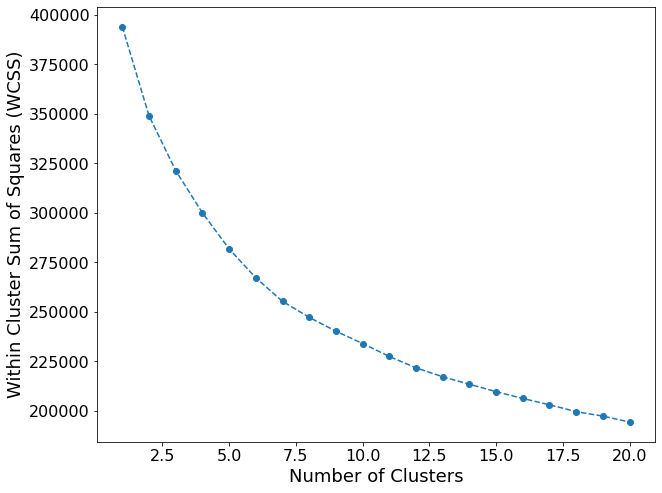

In [26]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

wcss = [] # get within cluster sum of squares for each value of k

max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_norm)
    wcss.append(kmeans_pca.inertia_)
      
# programmatically locate the elbow
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
# visualize the curve in order to locate the elbow
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, max_clusters), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [34]:
kmeans_pca = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_pca.fit(X_norm)
labs_1 = kmeans_pca.labels_

In [36]:
import sklearn
sklearn.metrics.davies_bouldin_score(X_norm, labs_1)

1.9516410092309469

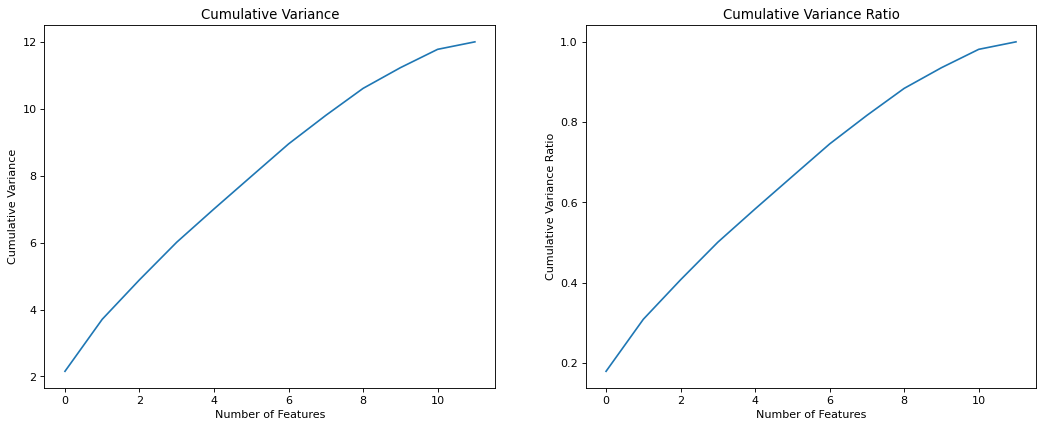

In [23]:
# PCA, we need to find out how many features we keep

pca_all = PCA(n_components=12)
principalComponents_all = pca_all.fit_transform(X_norm)
variance = pca_all.explained_variance_
ratio = pca_all.explained_variance_ratio_

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(list(range(len(variance))), np.cumsum(variance))
plt.title("Cumulative Variance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Variance")
plt.subplot(1, 2, 2)
plt.plot(list(range(len(variance))), np.cumsum(ratio))
plt.title("Cumulative Variance Ratio")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

Sooooo.... PCA is not going to help a lot because reducing to even 10 will not make models a lot faster and smaller dimentions loose all the variance in our data

In [33]:
kmeans_pca = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_pca.fit(X_norm)
labs_2 = kmeans_pca.labels_

sklearn.metrics.davies_bouldin_score(X_norm, labs_2)

1.9516410092309469

In [41]:
labs_2

array([4, 4, 5, ..., 1, 1, 3], dtype=int32)

In [40]:
# save labels to do the classification later
labels_kmeans = pd.DataFrame(labs_2)
labels_kmeans.to_csv("/Users/clarissaache/Documents/IDS 705 ML/ml-project/20 classification/labels_kmeans.csv")

In [42]:
labels_kmeans

,0
0,4
1,4
2,5
3,1
4,4
...,...
32828,1
32829,1
32830,1
32831,1


### Clustering Method #2: DBSCAN